In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

In [3]:
rootPath = './datasets'

In [4]:
imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'training_set'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'training_set'),
    target_size=(64, 64),
    subset='validation'
)

Found 7205 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


# Model

In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(ResNet50(include_top=True, weights=None, input_shape=(64, 64, 3), classes=2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2)                 23591810  
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [7]:
epochs = 32
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

C:\Users\jesung\AppData\Local\Temp/ipykernel_7892/2161297457.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/32
225/225 [==============================] - 103s 432ms/step - loss: 0.7593 - acc: 0.5839 - val_loss: 1.9274 - val_acc: 0.5000
Epoch 2/32
225/225 [==============================] - 91s 403ms/step - loss: 0.6287 - acc: 0.6555
Epoch 3/32
225/225 [==============================] - 91s 403ms/step - loss: 0.5971 - acc: 0.6992
Epoch 4/32
225/225 [==============================] - 91s 403ms/step - loss: 0.5773 - acc: 0.7026
Epoch 5/32
225/225 [==============================] - 91s 403ms/step - loss: 0.5298 - acc: 0.7348
Epoch 6/32
225/225 [==============================] - 91s 403ms/step - loss: 0.5214 - acc: 0.7489
Epoch 7/32
225/225 [==============================] - 91s 403ms/step - loss: 0.5129 - acc: 0.7591
Epoch 8/32
225/225 [==============================] - 91s 403ms/step - loss: 0.4681 - acc: 0.7795
Epoch 9/32
225/225 [==============================] - 91s 403ms/step - loss: 0.4921 - acc: 0.7663
Epoch 10/32
225/225 [==============================] - 91s 403ms/step - loss: 0.

## 학습결과 시각화

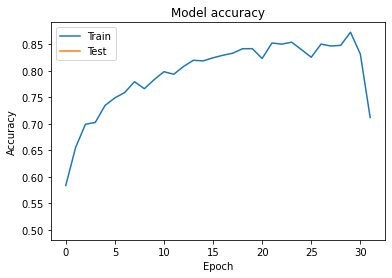

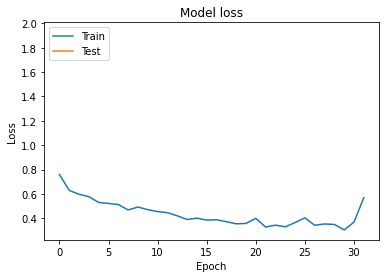

In [15]:
import matplotlib.pyplot as plt

# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 모델 중간 평가

In [16]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test_set'),
    target_size=(64, 64),
)

model.evaluate_generator(testGen)

Found 2023 images belonging to 2 classes.


C:\Users\jesung\AppData\Local\Temp/ipykernel_7892/3147658836.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(testGen)


[1.4983316659927368, 0.5788432955741882]

## 모델 추가 학습

In [17]:
epochs = 32
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

C:\Users\jesung\AppData\Local\Temp/ipykernel_7892/2161297457.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/32
225/225 [==============================] - 95s 422ms/step - loss: 0.4758 - acc: 0.7734 - val_loss: 0.8438 - val_acc: 0.5938
Epoch 2/32
225/225 [==============================] - 91s 403ms/step - loss: 0.3883 - acc: 0.8265
Epoch 3/32
225/225 [==============================] - 91s 403ms/step - loss: 0.3497 - acc: 0.8432
Epoch 4/32
225/225 [==============================] - 88s 390ms/step - loss: 0.3259 - acc: 0.8602
Epoch 5/32
225/225 [==============================] - 39s 175ms/step - loss: 0.3143 - acc: 0.8607
Epoch 6/32
225/225 [==============================] - 39s 175ms/step - loss: 0.2995 - acc: 0.8712
Epoch 7/32
225/225 [==============================] - 39s 175ms/step - loss: 0.3079 - acc: 0.8650
Epoch 8/32
225/225 [==============================] - 39s 175ms/step - loss: 0.2873 - acc: 0.8790
Epoch 9/32
225/225 [==============================] - 39s 175ms/step - loss: 0.2758 - acc: 0.8838
Epoch 10/32
225/225 [==============================] - 39s 175ms/step - loss: 0.2

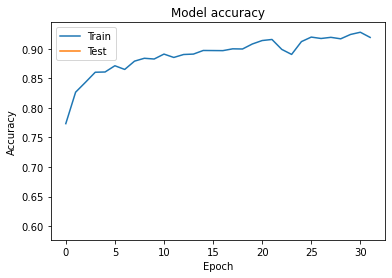

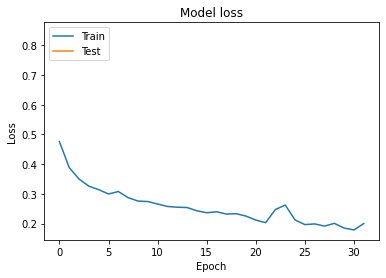

In [25]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
model.evaluate_generator(testGen)

C:\Users\jesung\AppData\Local\Temp/ipykernel_7892/3061071014.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(testGen)


[0.3362090587615967, 0.8596144318580627]